In this notebook we are going to take a look at the adult income dataset. This dataset was extracted from the 1994 US census data and contains demographic information and other features of a person and whether or not they earn more that $50k per year.

This is a binary classification problem as there are only two possible outcomes.

This dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult)

## Objectives

- Using the adult income data, predict with 70% or greater accuracy which people are likely to earn more that $50K per year.

- Find best algorithm to train our model

Let's get started

In [1]:
# import libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


In [2]:
# load the dataset
df = pd.read_csv('adult.csv')

# show first 5 rows
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


From the first 5 rows of our data we can see that there are 14 feature columns in our dataset -- some categorical features and other continuous. Let's group them.
### Categorial Features
- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex
- native-country

### Continuous Features
- age
- fnlwgt
- eductation-num
- capital-gain
- capital-loss
- hours-per-week

In [3]:
# Get shape
df.shape

(48842, 15)

## Missing Values
The following features contain missing values denoted as `?`:
- workclass
- occupation
- native country
It is very important to properly handle missing values because many machine learning algorithms do not support data with missing values. There are many ways to handle missing values:

- **Delete rows with missing values** - Use this when your dataset is big enough and the percentage of missing values is not high
- **Imputing missing values** - You can replace missing values by the mean, median or mode for numerical values. 
- **Assign a unique category** - You can assign a unique category to the missing values but be careful of the `curse of dimensionality`
- **Predict missing values** - You can use the features that do not have missing values to predict the missing values.

Now let's see the percentage of the missing values in each of the three feature columns

In [4]:
total = df.shape[0]
missing_occupation = len(df[df['occupation'] == '?']) * 1.0
missing_workclass = len(df[df['workclass']== '?']) * 1.0
missing_native_country = len(df[df['native-country'] == '?']) * 1.0

print('Percentage of missing values in occupation feature: {0:.2f}'.format(missing_occupation / total * 100))
print('Percentage of missing values in workclass feature: {0:.2f}'.format(missing_workclass / total * 100))
print('Percentage of missing values in native-country feature: {0:.2f}'.format(missing_native_country / total * 100))

Percentage of missing values in occupation feature: 5.75
Percentage of missing values in workclass feature: 5.73
Percentage of missing values in native-country feature: 1.75


The percentage of missing values  is low for all the three columns and our dataset is big enough. We can remove the rows that contain missing values.

In [5]:
# shape before removing rows
print('shape before', df.shape)
df = df[df.workclass != '?']
df = df[df.occupation != '?']
df = df[df['native-country'] != '?']
print('shape after', df.shape)

('shape before', (48842, 15))
('shape after', (45222, 15))


As you can see we have removed 3620 rows that contain missing values.

## Explore the data
In this step we explore our data to see what it can tell us

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# total of category in result column
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

The majority (about 75%) of the people in the dataset earn less that 50K per year.

## Age vs Income
Let's see if there is a relationship between one's age and their annual income.

In [8]:
above_50 = df[df.income == '>50K']
below_50 = df[df.income == '<=50K']

print('Mean age for those who earn >50K : %.2f' % above_50['age'].mean())
print('Mean age for those who earn <=50K : %.2f' % below_50['age'].mean())

Mean age for those who earn >50K : 44.01
Mean age for those who earn <=50K : 36.75


From the above we can see that high earners age relatively older than those who earn $50K and below.


## Education-num vs Income

In [9]:
print('Mean education-num for those who earn >50K: %.2f' % above_50['education-num'].mean())
print('Mean education-num for those who earn <=50K: %.2f' % below_50['education-num'].mean())

Mean education-num for those who earn >50K: 11.60
Mean education-num for those who earn <=50K: 9.63


High earners have a higher average `education-num`.

## Hours per week vs Income

In [10]:
print('Mean hours-per-week for those who earn >50K: %.2f' % above_50['hours-per-week'].mean())
print('Mean hours-per-week for those who earn <=50K: %.2f' % below_50['hours-per-week'].mean())

Mean hours-per-week for those who earn >50K: 45.69
Mean hours-per-week for those who earn <=50K: 39.37


High earners work more hours.

## Workclass

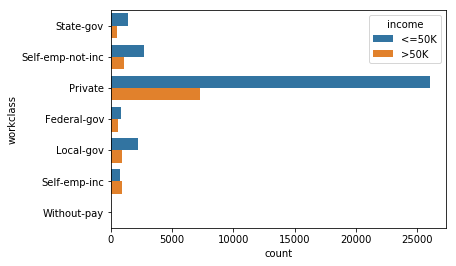

In [11]:
sns.countplot(y='workclass', hue='income', data=df)

## Occupation

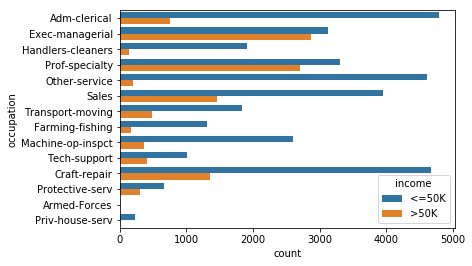

In [12]:
sns.countplot(y='occupation', hue='income', data=df)

## Education

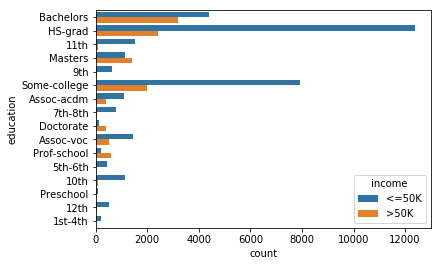

In [13]:
sns.countplot(y='education', hue='income', data=df)

## Race

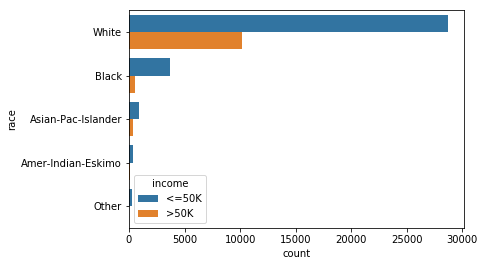

In [14]:
sns.countplot(y='race', hue='income', data=df)

## Marital status

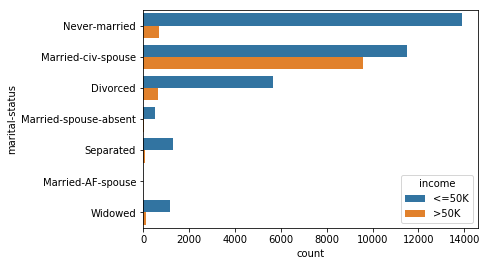

In [15]:
sns.countplot(y='marital-status', hue='income', data=df)

## Dealing with categorical data
8 of our features are categorical and our result column is also categorial. We need to convert there column to numeric value before we train our models

In [16]:
# replace <=50K with 0 and > 50K with 1
income = {'<=50K': 0, '>50K': 1}
df = df.replace({'income': income})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Dummy variables
A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absense of something. We can use dummy variables to encode or categorical features. Let's take a look at how `Sex` can be encoded with dummy variables:


In [17]:
sex_df = pd.DataFrame(['Male', 'Female', 'Female'],columns=['Sex'])
sex_df

,Sex
0,Male
1,Female
2,Female


Now let's use dummy variables to encode the sex column

In [18]:
sex_df = pd.get_dummies(sex_df)
sex_df

,Sex_Female,Sex_Male
0,0,1
1,1,0
2,1,0


As you can see we now have two columns `Sex_Female` and `Sex_Male`. When a person is male `Sex_Male` is 1 and `Sex_Female` is 0 and vice versa.

We are going to use the same technique to encode all the categorical features in our dataset.

In [19]:
# create dummy variables
df = pd.get_dummies(df)
df.shape

(45222, 105)

After creating dummy variables we now have 104 features in our dataset.  Now let's train some models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [21]:
Y = df['income']
X = df.drop('income', axis=1)
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

We are going to use the following algorithms to train our models:

- SVM
- Decision Tree
- Naive Bayes
- K-Nearest Neighbors
- LinearRegression

In [22]:
accuracy_dict = dict()
SVM = SVC()
DT = DecisionTreeClassifier()
NB = GaussianNB()
KNN = KNeighborsClassifier()
LR = LinearRegression()

## SVM

In [23]:
SVM.fit(x_train, y_train)
pred = SVM.predict(x_test)
accuracy_dict['SVM'] = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.97      0.85     10123
           1       0.46      0.07      0.12      3444

   micro avg       0.74      0.74      0.74     13567
   macro avg       0.61      0.52      0.48     13567
weighted avg       0.68      0.74      0.66     13567



## Decision Tree

In [24]:
DT.fit(x_train, y_train)
pred = DT.predict(x_test)
accuracy_dict['Decision Tree'] = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10123
           1       0.62      0.63      0.62      3444

   micro avg       0.81      0.81      0.81     13567
   macro avg       0.75      0.75      0.75     13567
weighted avg       0.81      0.81      0.81     13567



## K-Nearest Neighbors

In [25]:
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)
accuracy_dict['K-Nearest Neighbors'] = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     10123
           1       0.57      0.33      0.41      3444

   micro avg       0.77      0.77      0.77     13567
   macro avg       0.68      0.62      0.63     13567
weighted avg       0.74      0.77      0.74     13567



## Naive Bayes

In [26]:
NB.fit(x_train, y_train)
pred = NB.predict(x_test)
accuracy_dict['Naive Bayes'] = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10123
           1       0.65      0.30      0.41      3444

   micro avg       0.78      0.78      0.78     13567
   macro avg       0.73      0.62      0.64     13567
weighted avg       0.76      0.78      0.75     13567



## Linear Regression

In [27]:
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
accuracy_dict['Linear Regression'] = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     10123
           1       0.75      0.52      0.61      3444

   micro avg       0.83      0.83      0.83     13567
   macro avg       0.80      0.73      0.75     13567
weighted avg       0.83      0.83      0.82     13567



In [28]:
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Algorithm', 'Accuracy'])
accuracy_df

,Algorithm,Accuracy
0,K-Nearest Neighbors,0.766197
1,Linear Regression,0.833419
2,SVM,0.743053
3,Naive Bayes,0.782192
4,Decision Tree,0.808359


## Results
All our model achieved more than 70% accuracy but `SVM` took too long to train and has the lowest accuracy score.

## Is Accuracy Enough?

Our dataset is slightly imbalanced with over 75% of the people earning less than or equal to $50K per year so accuracy is not a good metric to use. We can use `Precision`, `Recall` and `F1-Score` to see how well our model peforms.

## Which is the best algorithm
Linear regression has the best of all metrics so in this example it is the best algorithm.